In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "CropPriceNew.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [3]:
print(df.head())

            ExchangeRate  HeadlineInflation  FuelPrice(Diesel)  Beans  Carrot  \
Date                                                                            
2024-01-01        322.75              200.7                358  450.0   550.0   
2024-01-02        321.50              200.7                358  550.0   700.0   
2024-01-03        322.50              200.7                358  500.0   700.0   
2024-01-04        322.50              200.7                358  450.0   750.0   
2024-01-05        322.50              200.7                358  450.0   700.0   

            Cabbage  Tomatoes  Brinjals  Red Pumpkin  Snake Gourd  \
Date                                                                
2024-01-01    450.0     400.0     700.0        150.0        200.0   
2024-01-02    500.0     600.0     450.0        150.0        200.0   
2024-01-03    450.0     600.0     550.0        150.0        200.0   
2024-01-04    400.0     550.0     600.0        150.0        180.0   
2024-01-05    430.

In [4]:
df.shape

(397, 16)

In [5]:
# Check for missing values
print(df.isnull().sum())

ExchangeRate           0
HeadlineInflation      0
FuelPrice(Diesel)      0
Beans                134
Carrot               134
Cabbage              134
Tomatoes             134
Brinjals             134
Red Pumpkin          134
Snake Gourd          135
GreenChillie         134
Red Onions           176
Potatoes             135
Dhal                 134
Banana               134
Papaw                134
dtype: int64


In [6]:
# Load your dataset (assuming it's already loaded into 'df')
df.fillna(method='ffill', inplace=True)  # Apply forward fill

# Check if there are still missing values
print(df.isnull().sum())  # Should show 0 for columns where forward fill worked


ExchangeRate         0
HeadlineInflation    0
FuelPrice(Diesel)    0
Beans                0
Carrot               0
Cabbage              0
Tomatoes             0
Brinjals             0
Red Pumpkin          0
Snake Gourd          0
GreenChillie         0
Red Onions           0
Potatoes             0
Dhal                 0
Banana               0
Papaw                0
dtype: int64


C:\Users\nipunisi\AppData\Local\Temp\ipykernel_4732\2618498596.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Apply forward fill


In [7]:
df.dropna(inplace=True)  # Drops rows with any missing values

# Verify if there are still missing values
print(df.isnull().sum())  # Should show all zeros


ExchangeRate         0
HeadlineInflation    0
FuelPrice(Diesel)    0
Beans                0
Carrot               0
Cabbage              0
Tomatoes             0
Brinjals             0
Red Pumpkin          0
Snake Gourd          0
GreenChillie         0
Red Onions           0
Potatoes             0
Dhal                 0
Banana               0
Papaw                0
dtype: int64


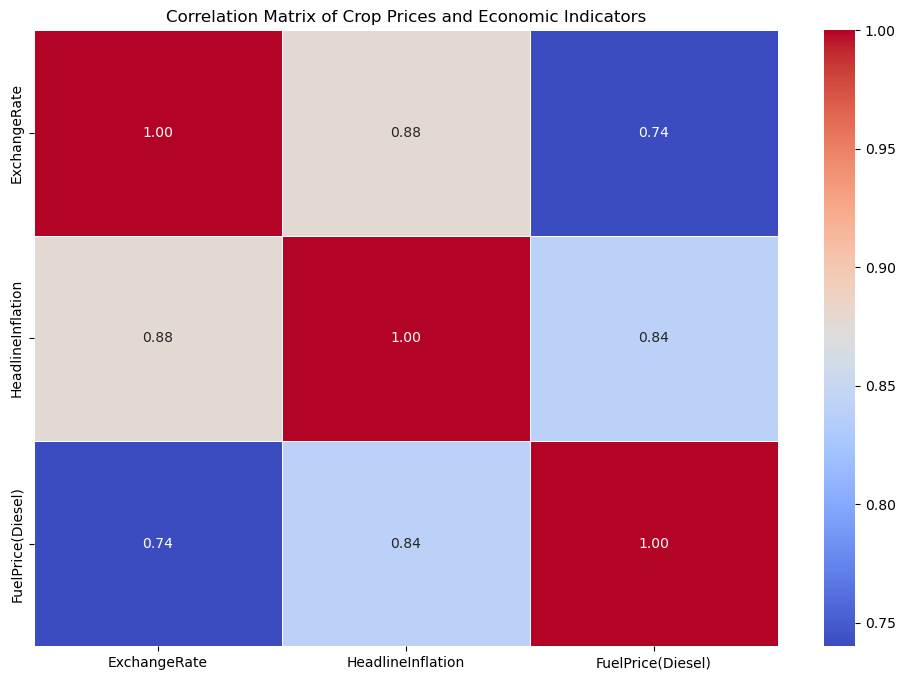

In [8]:
# Select numerical columns from the original DataFrame
df_selected_data = df[['ExchangeRate', 'HeadlineInflation', 'FuelPrice(Diesel)']]

# Calculate the correlation matrix on the selected columns
correlation_matrix = df_selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Crop Prices and Economic Indicators')
plt.show()


In [9]:
# Print the rounded correlation matrix
print("Correlation Matrix (Rounded):")
print(correlation_matrix.round(2))


Correlation Matrix (Rounded):
                   ExchangeRate  HeadlineInflation  FuelPrice(Diesel)
ExchangeRate               1.00               0.88               0.74
HeadlineInflation          0.88               1.00               0.84
FuelPrice(Diesel)          0.74               0.84               1.00


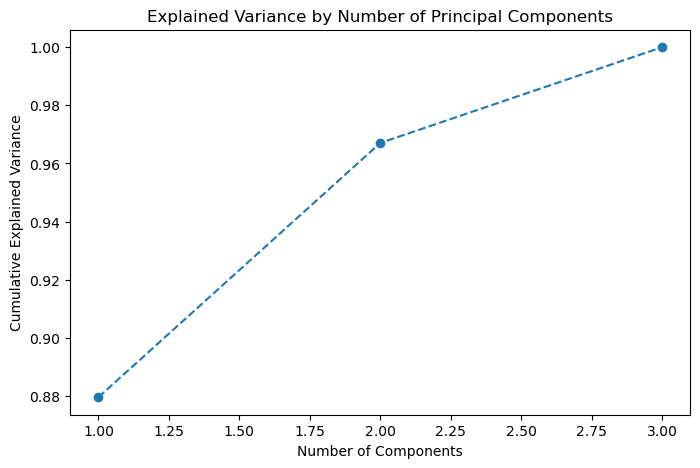

In [10]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['ExchangeRate', 'HeadlineInflation', 'FuelPrice(Diesel)']
df_scaled = scaler.fit_transform(df[features])



# Apply PCA without specifying components
pca = PCA()  
pca.fit(df_scaled)

# Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

In [11]:
# Print explained variance ratio for each component
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f} (Cumulative Variance)")


PC1: 0.8796 (Cumulative Variance)
PC2: 0.9670 (Cumulative Variance)
PC3: 1.0000 (Cumulative Variance)


In [12]:
pca = PCA(n_components=1)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(principal_components, columns=['EconIndex'])
df_pca.index = df.index  # Retain the original date index

# Check the explained variance of the selected components
print("Explained Variance Ratio for component:", pca.explained_variance_ratio_)

# Print the PCA transformed data (first few rows)
print("\nPCA Transformed Data (First 5 rows):")
print(df_pca.head())


Explained Variance Ratio for component: [0.87955023]

PCA Transformed Data (First 5 rows):
            EconIndex
Date                 
2024-01-01   3.337311
2024-01-02   3.247611
2024-01-03   3.319371
2024-01-04   3.319371
2024-01-05   3.319371


In [13]:

# Re-initialize the scaler and PCA objects
scaler = StandardScaler()  # Initialize StandardScaler
features = ['ExchangeRate', 'HeadlineInflation', 'FuelPrice(Diesel)']

# Standardize the data (only for the selected economic features)
df_scaled = scaler.fit_transform(df[features])

# Apply PCA to get the first principal component (PC1)
pca = PCA()  # Initialize PCA (ensure it's created)
pca.fit(df_scaled)  # Fit PCA on the scaled data

# Add PC1 to the original dataframe as EconIndex
df['EconIndex'] = pca.transform(df_scaled)[:, 0]  # First principal component (PC1)

# Print the updated DataFrame with EconIndex
print("\nUpdated DataFrame with EconIndex:")
print(df.head())



Updated DataFrame with EconIndex:
            ExchangeRate  HeadlineInflation  FuelPrice(Diesel)  Beans  Carrot  \
Date                                                                            
2024-01-01        322.75              200.7                358  450.0   550.0   
2024-01-02        321.50              200.7                358  550.0   700.0   
2024-01-03        322.50              200.7                358  500.0   700.0   
2024-01-04        322.50              200.7                358  450.0   750.0   
2024-01-05        322.50              200.7                358  450.0   700.0   

            Cabbage  Tomatoes  Brinjals  Red Pumpkin  Snake Gourd  \
Date                                                                
2024-01-01    450.0     400.0     700.0        150.0        200.0   
2024-01-02    500.0     600.0     450.0        150.0        200.0   
2024-01-03    450.0     600.0     550.0        150.0        200.0   
2024-01-04    400.0     550.0     600.0        150.0

In [14]:
# Save the updated DataFrame to a CSV file
df.to_csv("updated_dataset_with_econindex.csv", index=False)

# Print confirmation message
print("Dataset saved as 'updated_dataset_with_econindex.csv'")


Dataset saved as 'updated_dataset_with_econindex.csv'


In [15]:
# Select columns for correlation (PC1 and all vegetable price columns)
vegetable_columns = ['Beans', 'Carrot', 'Cabbage', 'Tomatoes', 'Brinjals', 'Red Pumpkin', 
                     'Snake Gourd', 'GreenChillie', 'Red Onions', 'Potatoes', 'Dhal', 'Banana', 'Papaw']
0.302771
# Calculate the correlation between PC1 and each vegetable price
correlation_with_pc1 = df[vegetable_columns].corrwith(df['EconIndex'])

# Print the correlation results
print("Correlation between EconIndex and Vegetable Prices:")
print(correlation_with_pc1)


Correlation between EconIndex and Vegetable Prices:
Beans           0.275969
Carrot          0.740434
Cabbage         0.781559
Tomatoes        0.539821
Brinjals        0.314204
Red Pumpkin     0.553664
Snake Gourd     0.117444
GreenChillie    0.242527
Red Onions      0.302771
Potatoes        0.123458
Dhal            0.899053
Banana          0.618978
Papaw           0.425345
dtype: float64


## Time Series

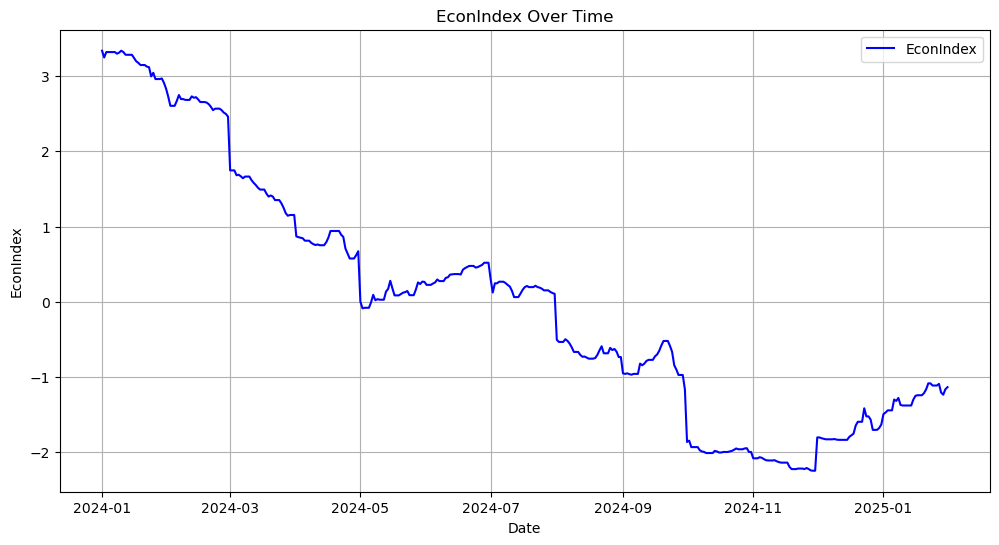

In [16]:
# Visualizing EconIndex over time
plt.figure(figsize=(12, 6))
plt.plot(df['EconIndex'], label='EconIndex', color='blue')
plt.title('EconIndex Over Time')
plt.xlabel('Date')
plt.ylabel('EconIndex')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# # Visualizing vegetable prices over time
# plt.figure(figsize=(12, 6))
# df[vegetable_columns].plot()
# plt.title('Vegetable Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend(vegetable_columns)
# plt.grid(True)
# plt.show()

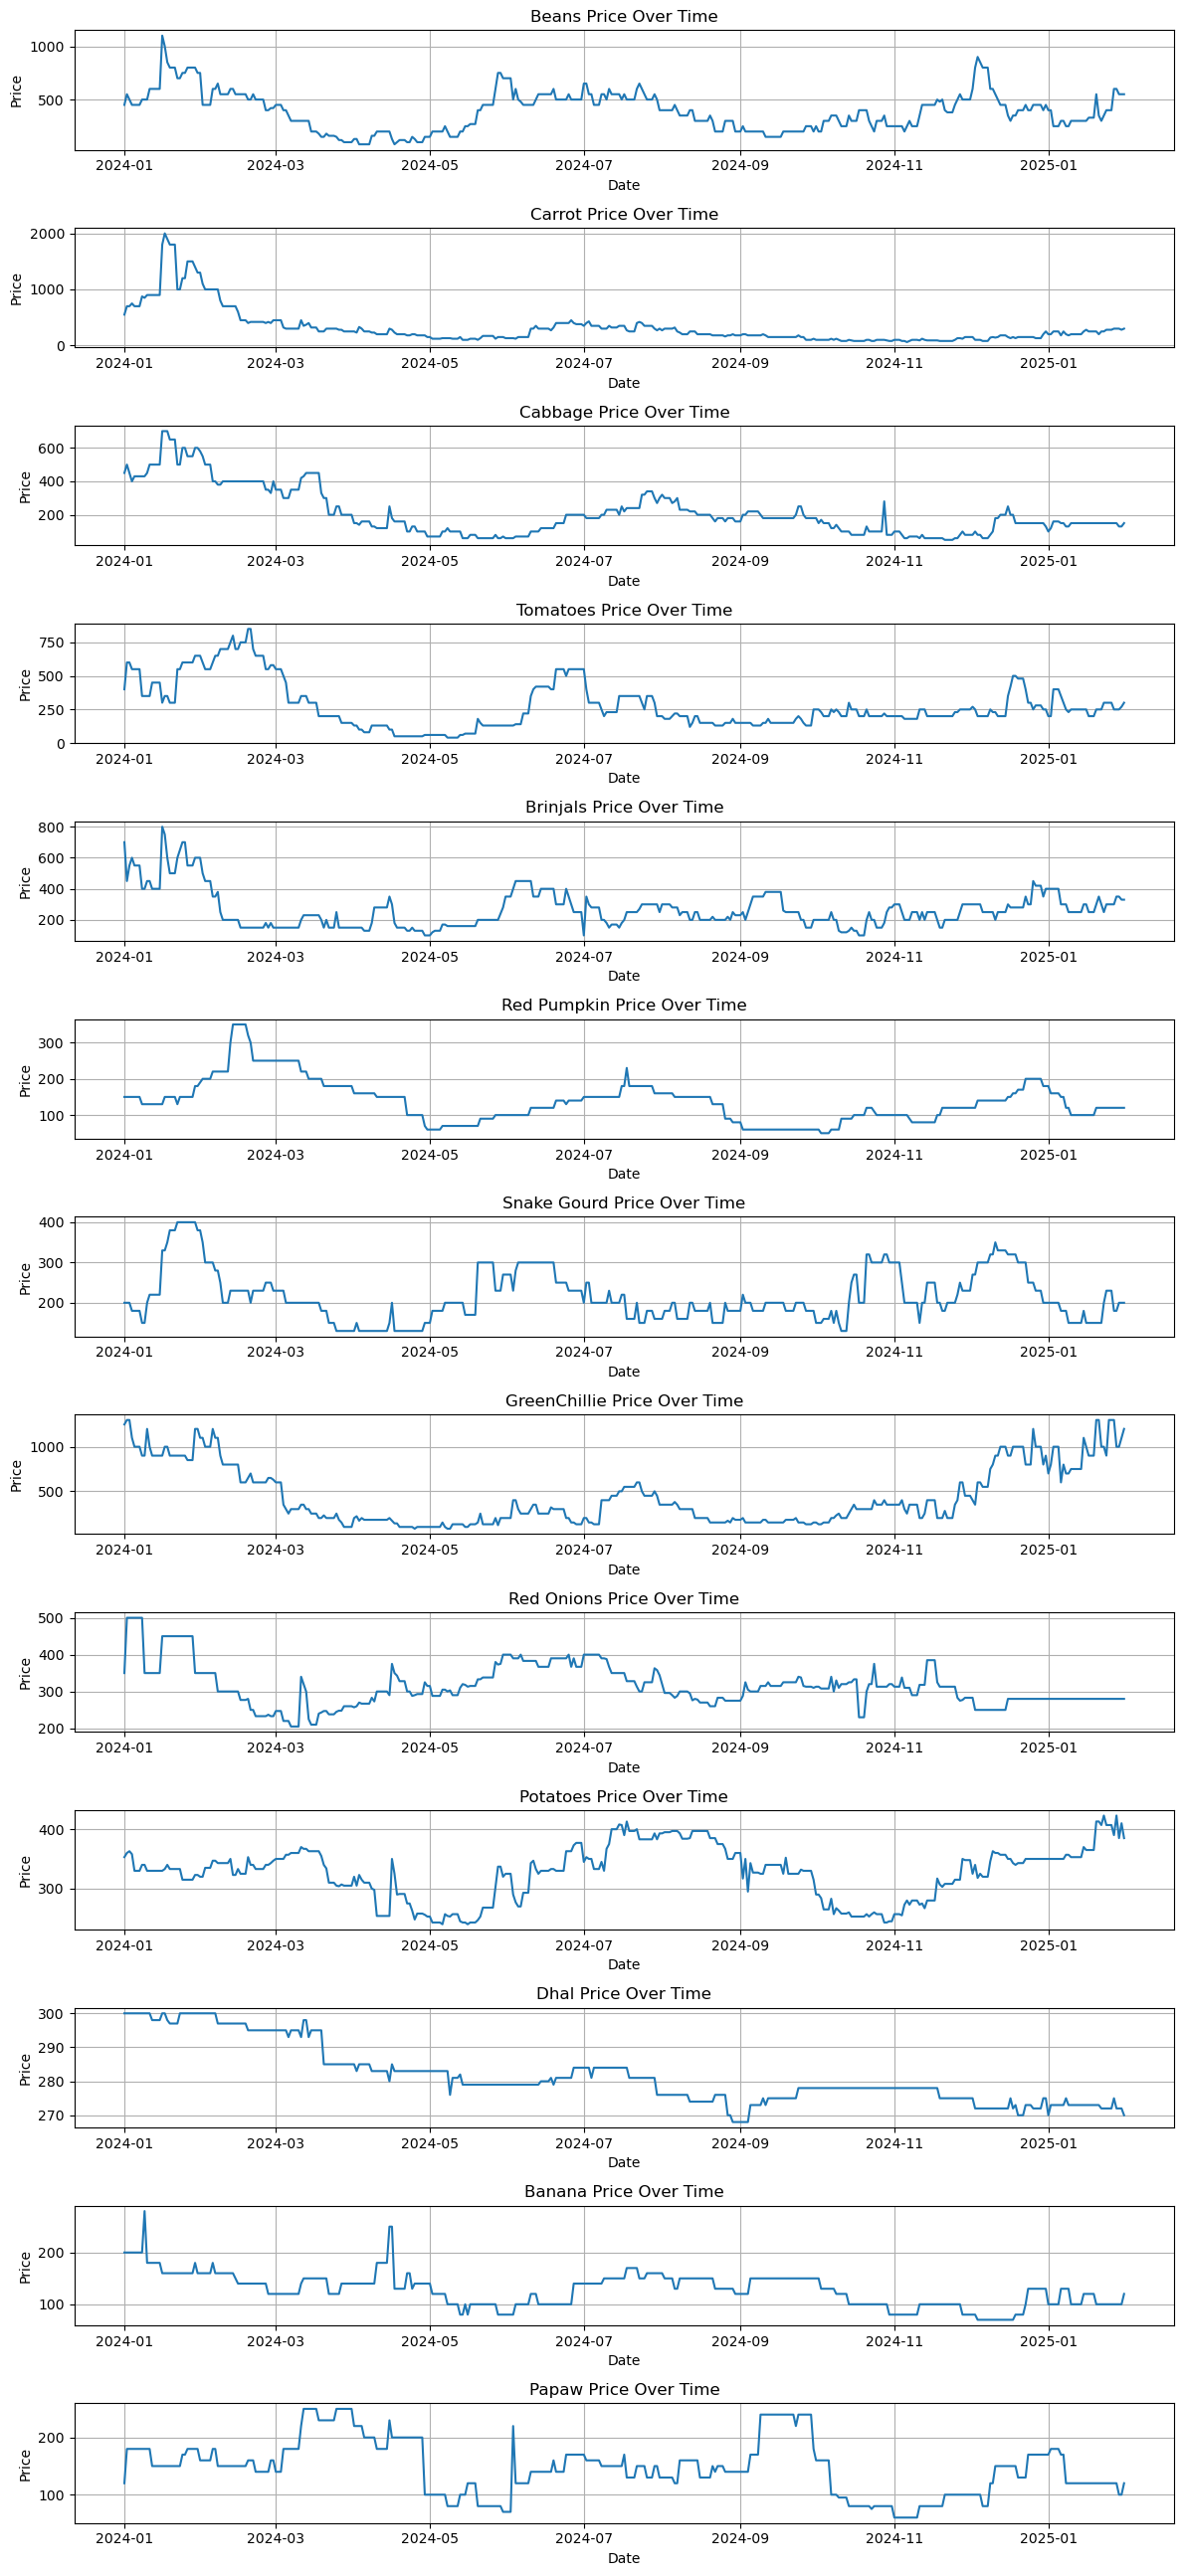

In [18]:
# Visualizing each vegetable price separately using subplots
fig, axes = plt.subplots(len(vegetable_columns), 1, figsize=(12, 2 * len(vegetable_columns)))

# Loop through each vegetable and create a subplot for it
for i, vegetable in enumerate(vegetable_columns):
    axes[i].plot(df.index, df[vegetable], label=vegetable)
    axes[i].set_title(f'{vegetable} Price Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Variables to test (excluding EconIndex in final DataFrames)
columns_to_test = ['EconIndex', 'Beans', 'Carrot', 'Cabbage', 'Tomatoes', 'Brinjals',
                   'Red Pumpkin', 'Snake Gourd', 'GreenChillie', 'Red Onions',
                   'Potatoes', 'Dhal', 'Banana', 'Papaw']

integration_order = {}  # To store I(0), I(1), etc.

def get_adf_result(series, signif=0.05, max_diff=2):
    level = 0
    current_series = series.copy()
    while level <= max_diff:
        result = adfuller(current_series.dropna(), autolag='AIC')
        # result = adfuller(current_series.dropna(), autolag='AIC', regression='ct')
        p_value = result[1]
        if p_value < signif:
            return level  # Stationary at current level (I(level))
        else:
            current_series = current_series.diff()
            level += 1
    return None  # Not stationary even at I(2)

# Run ADF tests and determine integration order
for col in columns_to_test:
    order = get_adf_result(df[col])
    integration_order[col] = order
    status = f"I({order})" if order is not None else "Non-stationary even at I(2)"
    print(f"{col}: {status}")

print("\n" + "="*60)

# Separate into I(0) and I(1) DataFrames, excluding EconIndex
i0_columns = [col for col, order in integration_order.items() if order == 0 and col != 'EconIndex']
i1_columns = [col for col, order in integration_order.items() if order == 1 and col != 'EconIndex']

df_i0 = df[i0_columns].copy()
df_i1 = df[i1_columns].copy()
econ_index = df[['EconIndex']].copy()

# Final results
print(f"I(0) Variables: {i0_columns}")
print(f"I(1) Variables: {i1_columns}")


EconIndex: I(1)
Beans: I(1)
Carrot: I(0)
Cabbage: I(1)
Tomatoes: I(0)
Brinjals: I(0)
Red Pumpkin: I(1)
Snake Gourd: I(0)
GreenChillie: I(1)
Red Onions: I(0)
Potatoes: I(1)
Dhal: I(1)
Banana: I(0)
Papaw: I(1)

I(0) Variables: ['Carrot', 'Tomatoes', 'Brinjals', 'Snake Gourd', 'Red Onions', 'Banana']
I(1) Variables: ['Beans', 'Cabbage', 'Red Pumpkin', 'GreenChillie', 'Potatoes', 'Dhal', 'Papaw']


<Figure size 1000x600 with 0 Axes>

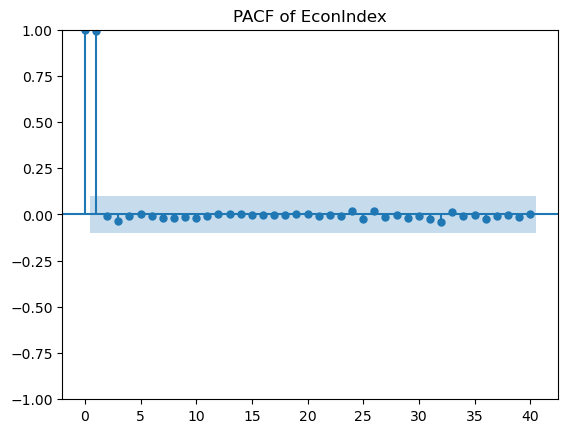

<Figure size 1000x600 with 0 Axes>

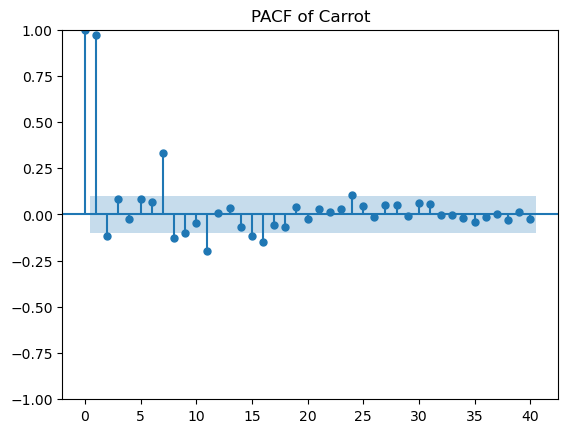

<Figure size 1000x600 with 0 Axes>

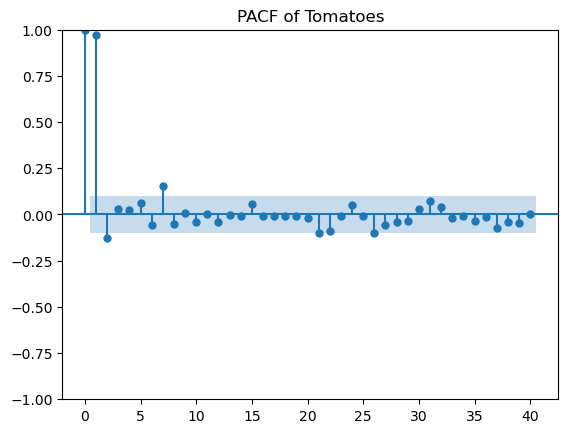

<Figure size 1000x600 with 0 Axes>

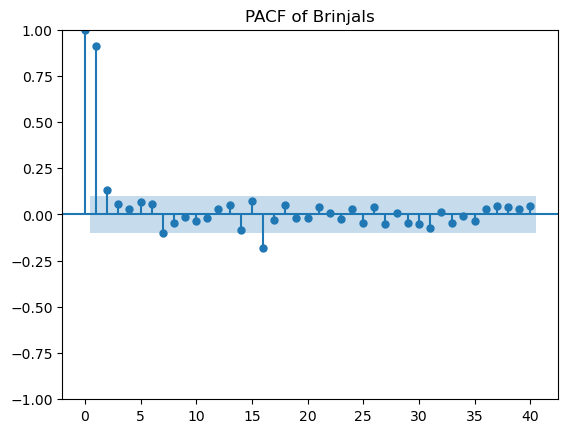

<Figure size 1000x600 with 0 Axes>

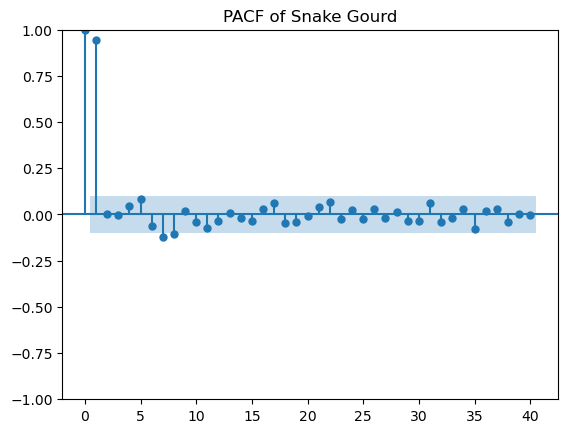

<Figure size 1000x600 with 0 Axes>

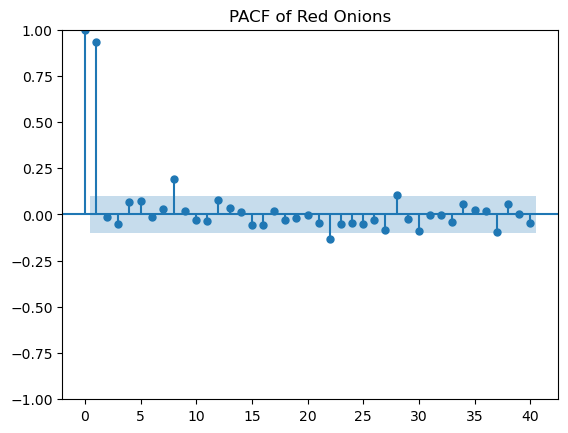

<Figure size 1000x600 with 0 Axes>

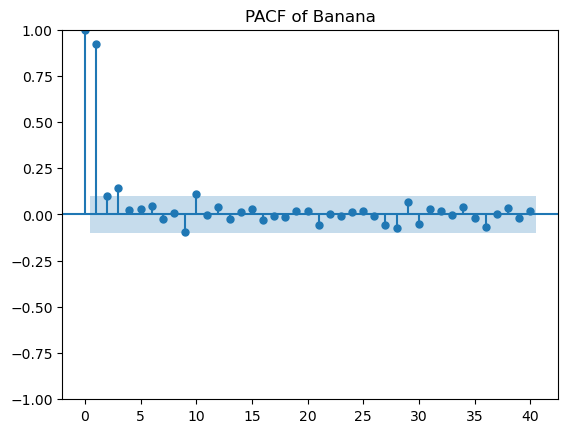

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Filter only I(0) variables, excluding 'EconIndex'
i0_columns = [col for col, order in integration_order.items() if order == 0 and col != 'EconIndex']

plt.figure(figsize=(10, 6))
plot_pacf(df['EconIndex'], lags=40, method='ywm', title="PACF of EconIndex")
plt.show()

# Loop through each I(0) variable and plot PACF
for var in i0_columns:
    df_var = df[var]
    
    plt.figure(figsize=(10, 6))
    plot_pacf(df_var, lags=40, method='ywm', title=f"PACF of {var}")
    plt.show()



In [21]:
from statsmodels.tsa.stattools import pacf
import numpy as np

# Assuming you have the list of I(0) variables, as before
i0_columns = [col for col, order in integration_order.items() if order == 0]  # Get only I(0) variables

# Loop through each I(0) variable (excluding 'EconIndex') and calculate PACF values
for var in i0_columns:
    # Get the dataset for the current I(0) variable
    df_var = df[var]
    
    # Calculate PACF for the variable (up to 40 lags, adjust if needed)
    pacf_values = pacf(df_var, nlags=40)
    
    # Identify the significant lags based on PACF values (values greater than 0.2 or less than -0.2)
    significant_lags = np.where(np.abs(pacf_values) > 0.2)[0]  # Threshold for significance

    # Display results for the PACF values and significant lags
    print(f"PACF for {var}:")
    print(f"  PACF values: {pacf_values}")
    print(f"  Significant lags (abs(pacf) > 0.2): {significant_lags}")
    print(f"  Number of significant lags: {len(significant_lags)}")
    print("-" * 40)

# For 'EconIndex', calculate PACF separately
df_econ = df['EconIndex']
pacf_values_econ = pacf(df_econ, nlags=40)
significant_lags_econ = np.where(np.abs(pacf_values_econ) > 0.2)[0]

# Display PACF for EconIndex separately
print(f"PACF for EconIndex:")
print(f"  PACF values: {pacf_values_econ}")
print(f"  Significant lags (abs(pacf) > 0.2): {significant_lags_econ}")
print(f"  Number of significant lags: {len(significant_lags_econ)}")
print("-" * 40)


PACF for Carrot:
  PACF values: [ 1.00000000e+00  9.74640275e-01 -1.29531617e-01  9.26476230e-02
 -2.74027582e-02  9.54354365e-02  7.11830802e-02  3.75197905e-01
 -1.58583190e-01 -1.00787442e-01 -5.73614398e-02 -2.24266855e-01
  1.96001018e-02  5.10354887e-02 -8.82391400e-02 -1.45393226e-01
 -1.76668274e-01 -8.85267913e-02 -8.13655574e-02  5.99232002e-02
 -4.29768795e-02  3.41083228e-02  2.22340227e-04  3.60907643e-02
  1.41623258e-01  8.30541810e-02 -2.22999465e-03  8.03645772e-02
  7.32740935e-02  4.09954771e-03  1.07456441e-01  9.22385576e-02
 -4.10559330e-03  5.59521284e-03 -3.45089164e-02 -6.78526544e-02
 -1.87219008e-02 -1.02392992e-02 -7.21315007e-02 -9.01572253e-03
 -6.71114688e-02]
  Significant lags (abs(pacf) > 0.2): [ 0  1  7 11]
  Number of significant lags: 4
----------------------------------------
PACF for Tomatoes:
  PACF values: [ 1.          0.97436918 -0.14102142  0.0336799   0.02754197  0.0712601
 -0.06413111  0.17217887 -0.06450147  0.01146478 -0.04968995  0.00640

In [22]:
# List of vegetables to create datasets for


# Loop through each vegetable and create a separate dataset
for vegetable in i0_columns:
    df_vegetable = df[['EconIndex', vegetable]]
    globals()[f"df_{vegetable.lower()}"] = df_vegetable  # Create a variable with the vegetable name

    # Optional: Check the first few rows of the newly created dataset
    print(f"\ndf_{vegetable.lower()} created:")
    print(globals()[f"df_{vegetable.lower()}"].head())



df_carrot created:
            EconIndex  Carrot
Date                         
2024-01-01   3.337311   550.0
2024-01-02   3.247611   700.0
2024-01-03   3.319371   700.0
2024-01-04   3.319371   750.0
2024-01-05   3.319371   700.0

df_tomatoes created:
            EconIndex  Tomatoes
Date                           
2024-01-01   3.337311     400.0
2024-01-02   3.247611     600.0
2024-01-03   3.319371     600.0
2024-01-04   3.319371     550.0
2024-01-05   3.319371     550.0

df_brinjals created:
            EconIndex  Brinjals
Date                           
2024-01-01   3.337311     700.0
2024-01-02   3.247611     450.0
2024-01-03   3.319371     550.0
2024-01-04   3.319371     600.0
2024-01-05   3.319371     550.0

df_snake gourd created:
            EconIndex  Snake Gourd
Date                              
2024-01-01   3.337311        200.0
2024-01-02   3.247611        200.0
2024-01-03   3.319371        200.0
2024-01-04   3.319371        180.0
2024-01-05   3.319371        180.0

df_red 

In [23]:
df.head()

,ExchangeRate,HeadlineInflation,FuelPrice(Diesel),Beans,Carrot,Cabbage,Tomatoes,Brinjals,Red Pumpkin,Snake Gourd,GreenChillie,Red Onions,Potatoes,Dhal,Banana,Papaw,EconIndex
Date,,,,,,,,,,,,,,,,,
2024-01-01,322.75,200.7,358,450.0,550.0,450.0,400.0,700.0,150.0,200.0,1250.0,350.0,353.0,300.0,200.0,120.0,3.337311
2024-01-02,321.50,200.7,358,550.0,700.0,500.0,600.0,450.0,150.0,200.0,1300.0,500.0,360.0,300.0,200.0,180.0,3.247611
2024-01-03,322.50,200.7,358,500.0,700.0,450.0,600.0,550.0,150.0,200.0,1300.0,500.0,363.0,300.0,200.0,180.0,3.319371
2024-01-04,322.50,200.7,358,450.0,750.0,400.0,550.0,600.0,150.0,180.0,1100.0,500.0,358.0,300.0,200.0,180.0,3.319371
2024-01-05,322.50,200.7,358,450.0,700.0,430.0,550.0,550.0,150.0,180.0,1000.0,500.0,330.0,300.0,200.0,180.0,3.319371


Processing Carrot...
ADF Test for Carrot:
Test Statistic: -9.095262692835945
P-Value: 3.7298336882122134e-15
Carrot is stationary.

ADF Test for EconIndex:
Test Statistic: -2.110994594540473
P-Value: 0.2401166638351387
EconIndex is NOT stationary. Differencing may be needed.

Best ARDL model for Carrot uses 10 lags (based on AIC).

                              ARDL Model Results                              
Dep. Variable:                 Carrot   No. Observations:                  397
Model:                   ARDL(10, 10)   Log Likelihood               -2166.885
Method:               Conditional MLE   S.D. of innovations             65.382
Date:                Wed, 16 Apr 2025   AIC                           4361.770
Time:                        11:41:41   BIC                           4417.188
Sample:                    01-11-2024   HQIC                          4383.744
                         - 01-31-2025                                         
                    coef    std er

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

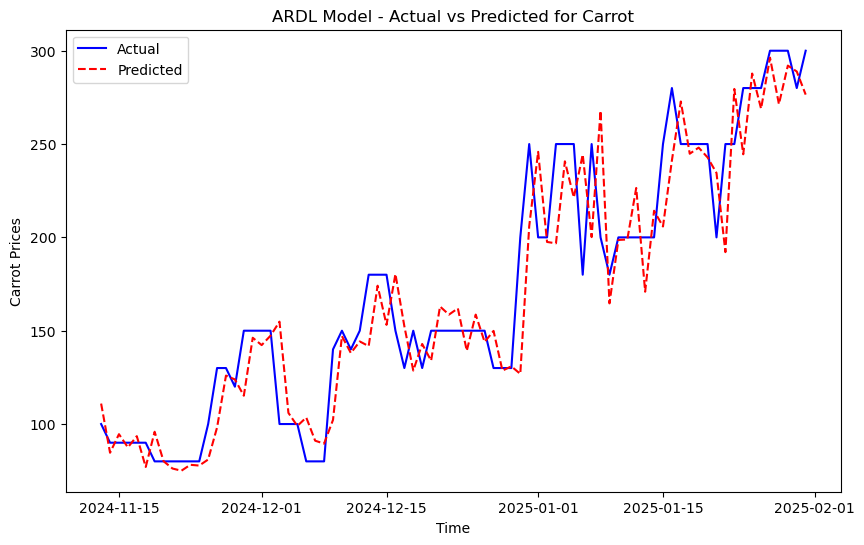

Processing Tomatoes...
ADF Test for Tomatoes:
Test Statistic: -2.868213508266453
P-Value: 0.04917116234202069
Tomatoes is stationary.

ADF Test for EconIndex:
Test Statistic: -2.110994594540473
P-Value: 0.2401166638351387
EconIndex is NOT stationary. Differencing may be needed.

Best ARDL model for Tomatoes uses 10 lags (based on AIC).

                              ARDL Model Results                              
Dep. Variable:               Tomatoes   No. Observations:                  397
Model:                   ARDL(10, 10)   Log Likelihood               -1951.190
Method:               Conditional MLE   S.D. of innovations             37.446
Date:                Wed, 16 Apr 2025   AIC                           3930.381
Time:                        11:41:42   BIC                           3985.798
Sample:                    01-11-2024   HQIC                          3952.355
                         - 01-31-2025                                         
                    coef    s

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

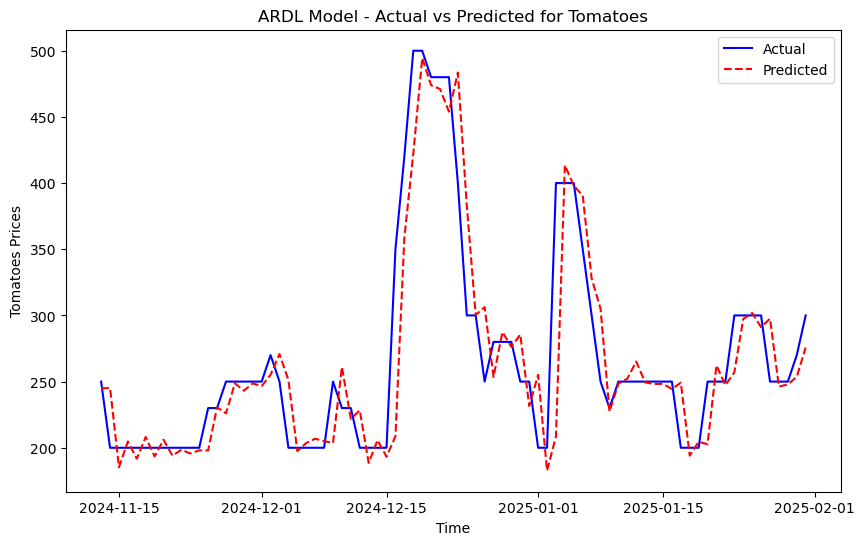

Processing Brinjals...
ADF Test for Brinjals:
Test Statistic: -3.2038175152630144
P-Value: 0.019764767130408513
Brinjals is stationary.

ADF Test for EconIndex:
Test Statistic: -2.110994594540473
P-Value: 0.2401166638351387
EconIndex is NOT stationary. Differencing may be needed.

Best ARDL model for Brinjals uses 10 lags (based on AIC).

                              ARDL Model Results                              
Dep. Variable:               Brinjals   No. Observations:                  397
Model:                   ARDL(10, 10)   Log Likelihood               -1989.326
Method:               Conditional MLE   S.D. of innovations             41.324
Date:                Wed, 16 Apr 2025   AIC                           4006.652
Time:                        11:41:42   BIC                           4062.070
Sample:                    01-11-2024   HQIC                          4028.626
                         - 01-31-2025                                         
                    coef   

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

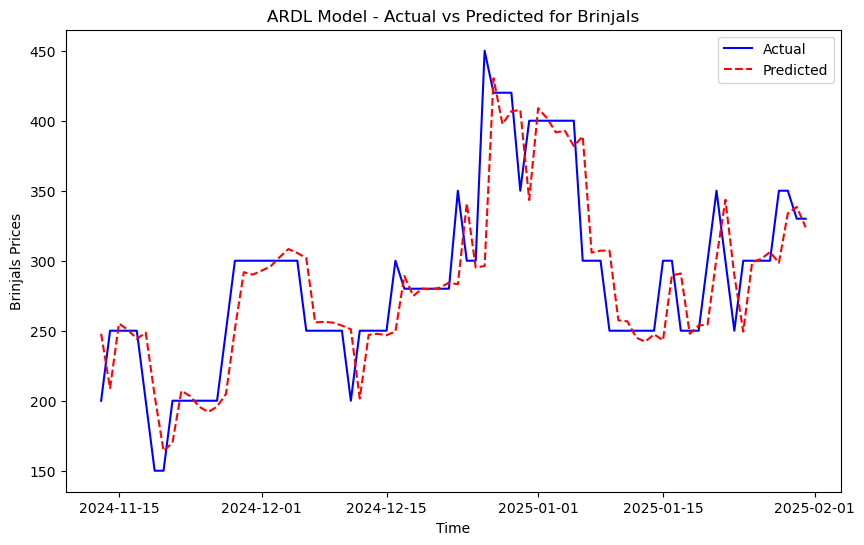

Processing Snake Gourd...
ADF Test for Snake Gourd:
Test Statistic: -3.306474918898002
P-Value: 0.014591514696967836
Snake Gourd is stationary.

ADF Test for EconIndex:
Test Statistic: -2.110994594540473
P-Value: 0.2401166638351387
EconIndex is NOT stationary. Differencing may be needed.

Best ARDL model for Snake Gourd uses 10 lags (based on AIC).

                              ARDL Model Results                              
Dep. Variable:            Snake Gourd   No. Observations:                  397
Model:                   ARDL(10, 10)   Log Likelihood               -1710.351
Method:               Conditional MLE   S.D. of innovations             20.097
Date:                Wed, 16 Apr 2025   AIC                           3448.702
Time:                        11:41:43   BIC                           3504.120
Sample:                    01-11-2024   HQIC                          3470.677
                         - 01-31-2025                                         
                

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

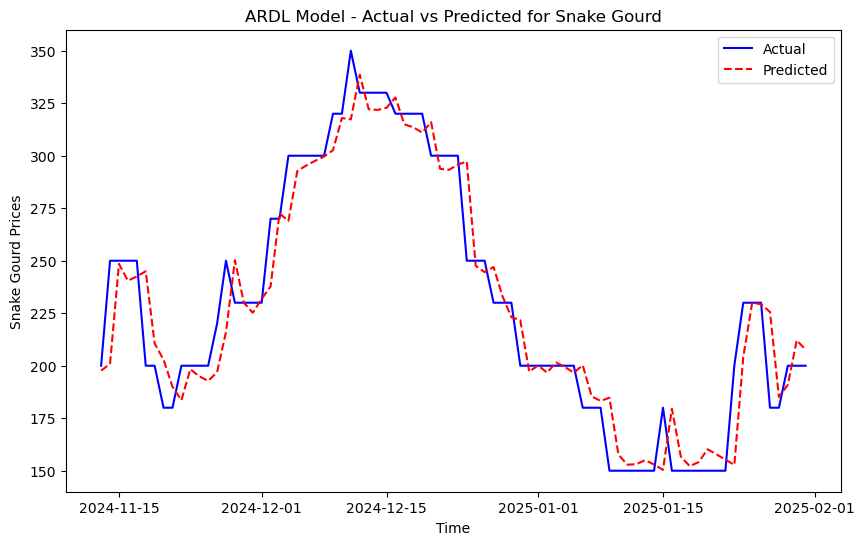

Processing Red Onions...
ADF Test for Red Onions:
Test Statistic: -3.750275447327188
P-Value: 0.0034590609624150417
Red Onions is stationary.

ADF Test for EconIndex:
Test Statistic: -2.110994594540473
P-Value: 0.2401166638351387
EconIndex is NOT stationary. Differencing may be needed.

Best ARDL model for Red Onions uses 10 lags (based on AIC).

                              ARDL Model Results                              
Dep. Variable:             Red Onions   No. Observations:                  397
Model:                   ARDL(10, 10)   Log Likelihood               -1647.694
Method:               Conditional MLE   S.D. of innovations             17.093
Date:                Wed, 16 Apr 2025   AIC                           3323.389
Time:                        11:41:44   BIC                           3378.806
Sample:                    01-11-2024   HQIC                          3345.363
                         - 01-31-2025                                         
                   

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

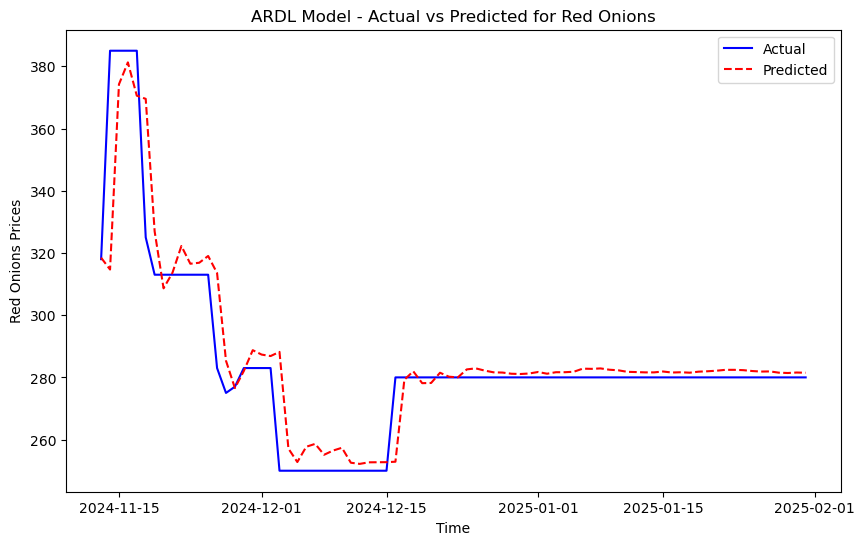

Processing Banana...
ADF Test for Banana:
Test Statistic: -3.2882027862995487
P-Value: 0.015414116638363052
Banana is stationary.

ADF Test for EconIndex:
Test Statistic: -2.110994594540473
P-Value: 0.2401166638351387
EconIndex is NOT stationary. Differencing may be needed.

Best ARDL model for Banana uses 10 lags (based on AIC).

                              ARDL Model Results                              
Dep. Variable:                 Banana   No. Observations:                  397
Model:                   ARDL(10, 10)   Log Likelihood               -1446.739
Method:               Conditional MLE   S.D. of innovations             10.170
Date:                Wed, 16 Apr 2025   AIC                           2921.478
Time:                        11:41:44   BIC                           2976.896
Sample:                    01-11-2024   HQIC                          2943.452
                         - 01-31-2025                                         
                    coef    std err

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

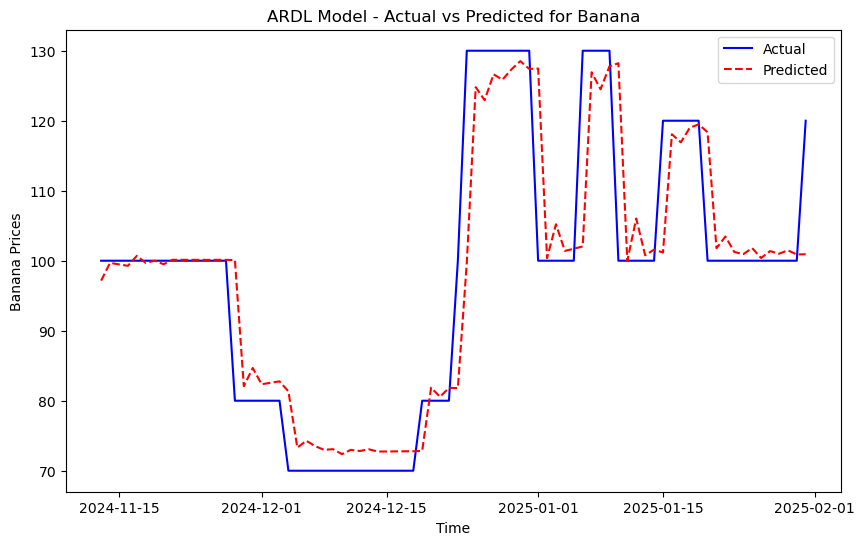

     Vegetable  R² Score       RMSE
0       Carrot  0.854931  25.730069
1     Tomatoes  0.758794  38.364355
2     Brinjals  0.710186  34.168634
3  Snake Gourd  0.911071  17.418977
4   Red Onions  0.825105  11.960121
5       Banana  0.812336   8.436149


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ardl import ARDL
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Function to check stationarity
def check_stationarity(series, name):
    result = adfuller(series)
    print(f"ADF Test for {name}:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-Value: {result[1]}")
    if result[1] <= 0.05:
        print(f"{name} is stationary.\n")
    else:
        print(f"{name} is NOT stationary. Differencing may be needed.\n")

# Initialize results storage
df_results = []

# Loop through each vegetable in `i0_columns`
for veg in i0_columns:
    print(f"Processing {veg}...")
    
    # Get dataset for the specific vegetable (df_veg)
    df_veg = globals().get(f"df_{veg.lower()}")  # Get dataset
    if df_veg is None:
        print(f"Dataset for {veg} not found! Skipping.\n")
        continue
    
    # Check stationarity for vegetable and EconIndex
    check_stationarity(df_veg[veg], veg)
    check_stationarity(df_veg['EconIndex'], 'EconIndex')
    
    # Determine optimal lag using AIC
    max_lag = 10
    best_aic = float('inf')
    best_lag = None
    
    # Loop to find the best lag based on AIC
    for lag in range(1, max_lag + 1):
        try:
            model = ARDL(df_veg[veg], lags=lag, exog=df_veg[['EconIndex']], order=(lag, 0))
            result = model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_lag = lag
        except:
            continue
    
    print(f"Best ARDL model for {veg} uses {best_lag} lags (based on AIC).\n")

    # Fit the final ARDL model
    model = ARDL(df_veg[veg], lags=best_lag, exog=df_veg[['EconIndex']], order=(best_lag, 0))
    result = model.fit()
    print(result.summary())
    
    # Train-test split
    train_size = int(len(df_veg) * 0.8)
    train, test = df_veg.iloc[:train_size], df_veg.iloc[train_size:]
    
    # Forecasting
    preds = result.predict(start=train_size, end=len(df_veg)-1, exog_oos=test[['EconIndex']])
    
    # Evaluate performance
    rmse = sqrt(mean_squared_error(test[veg], preds))
    r2 = r2_score(test[veg], preds)
    print(f"ARDL - RMSE for {veg}: {rmse}")
    print(f"ARDL - R² for {veg}: {r2}\n")
    
    # Store results for later summary
    df_results.append({
        'Vegetable': veg,
        'R² Score': r2,
        'RMSE': rmse
    })
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test[veg], label="Actual", color="blue")
    plt.plot(test.index, preds, label="Predicted", color="red", linestyle="dashed")
    plt.xlabel("Time")
    plt.ylabel(f"{veg} Prices")
    plt.title(f"ARDL Model - Actual vs Predicted for {veg}")
    plt.legend()
    plt.show()

# Convert results to DataFrame and display
df_metrics = pd.DataFrame(df_results)
print(df_metrics)

# At this point, `df` remains unchanged, and no modifications have been made to the original dataset.


In [25]:
df.head()


,ExchangeRate,HeadlineInflation,FuelPrice(Diesel),Beans,Carrot,Cabbage,Tomatoes,Brinjals,Red Pumpkin,Snake Gourd,GreenChillie,Red Onions,Potatoes,Dhal,Banana,Papaw,EconIndex
Date,,,,,,,,,,,,,,,,,
2024-01-01,322.75,200.7,358,450.0,550.0,450.0,400.0,700.0,150.0,200.0,1250.0,350.0,353.0,300.0,200.0,120.0,3.337311
2024-01-02,321.50,200.7,358,550.0,700.0,500.0,600.0,450.0,150.0,200.0,1300.0,500.0,360.0,300.0,200.0,180.0,3.247611
2024-01-03,322.50,200.7,358,500.0,700.0,450.0,600.0,550.0,150.0,200.0,1300.0,500.0,363.0,300.0,200.0,180.0,3.319371
2024-01-04,322.50,200.7,358,450.0,750.0,400.0,550.0,600.0,150.0,180.0,1100.0,500.0,358.0,300.0,200.0,180.0,3.319371
2024-01-05,322.50,200.7,358,450.0,700.0,430.0,550.0,550.0,150.0,180.0,1000.0,500.0,330.0,300.0,200.0,180.0,3.319371


### VECM

In [26]:
i1_columns


['Beans',
 'Cabbage',
 'Red Pumpkin',
 'GreenChillie',
 'Potatoes',
 'Dhal',
 'Papaw']

In [27]:
# # Prepare the data for VECM: Only I(1) variables and EconIndex
# data = df[i1_columns + ['EconIndex']].dropna()

# # Print to confirm the data looks good
# print(data.head())



In [28]:
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.api import VAR
# from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from math import sqrt

# results_list = []

# for veg in i1_columns:
#     print(f"\n🔍 Processing: {veg} vs EconIndex")
    
#     # Prepare the two series
#     temp_df = df[[veg, 'EconIndex']].dropna()
    
#     # Johansen cointegration test
#     coint_test = coint_johansen(temp_df, det_order=0, k_ar_diff=1)
#     trace_stat = coint_test.lr1[0]
#     critical_value = coint_test.cvt[0, 1]  # 5% level

#     print(f"Johansen Trace Stat: {trace_stat:.4f} | 5% Critical Value: {critical_value:.4f}")
    
#     if trace_stat > critical_value:
#         print(f"✅ Cointegrated — using VECM")
        
#         vecm_model = VECM(temp_df, k_ar_diff=1, coint_rank=1)
#         vecm_res = vecm_model.fit()
        
#         # Forecast (one-step out-of-sample prediction as example)
#         forecast = vecm_res.predict(steps=5)
#         print("VECM fitted.")
        
#         model_type = 'VECM'
#         rmse = np.nan  # Add real evaluation logic if needed
        
#     else:
#         print(f"❌ Not cointegrated — using VAR on differenced data")
        
#         diff_df = temp_df.diff().dropna()
#         var_model = VAR(diff_df)
#         var_res = var_model.fit(maxlags=10, ic='aic')
        
#         # Forecast next 5 steps (as example)
#         forecast = var_res.forecast(diff_df.values[-var_res.k_ar:], steps=5)
#         print("VAR fitted on differenced data.")
        
#         model_type = 'VAR (Diff)'
#         rmse = np.nan  # Add real evaluation logic if needed
        
#     # Save the model type used
#     results_list.append({'Vegetable': veg, 'Model Used': model_type})

# # Results
# results_df = pd.DataFrame(results_list)
# print("\n📊 Model Summary:")
# print(results_df)



In [29]:
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.api import VAR
# from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from math import sqrt

# # Optional: Fix frequency warning if needed
# df.index = pd.to_datetime(df.index)
# df = df.asfreq('D')

# results_list = []

# for veg in i1_columns:
#     print(f"\n🔍 Processing: {veg} vs EconIndex")
    
#     # Prepare the two series
#     temp_df = df[[veg, 'EconIndex']].dropna()
    
#     # Train-test split (80/20)
#     train_size = int(len(temp_df) * 0.8)
#     train_df = temp_df.iloc[:train_size]
#     test_df = temp_df.iloc[train_size:]
    
#     # Johansen cointegration test
#     coint_test = coint_johansen(train_df, det_order=0, k_ar_diff=1)
#     trace_stat = coint_test.lr1[0]
#     critical_value = coint_test.cvt[0, 1]  # 5% level

#     print(f"Johansen Trace Stat: {trace_stat:.4f} | 5% Critical Value: {critical_value:.4f}")
    
#     if trace_stat > critical_value:
#         print(f"✅ Cointegrated — using VECM")
        
#         vecm_model = VECM(train_df, k_ar_diff=1, coint_rank=1)
#         vecm_res = vecm_model.fit()
        
#         forecast = vecm_res.predict(steps=len(test_df))
#         forecast_df = pd.DataFrame(forecast, index=test_df.index, columns=[veg, 'EconIndex'])

#         # Evaluation
#         rmse = sqrt(mean_squared_error(test_df[veg], forecast_df[veg]))
#         r2 = r2_score(test_df[veg], forecast_df[veg])
        
#         print(f"📈 RMSE: {rmse:.4f} | R²: {r2:.4f}")
#         model_type = 'VECM'
    
#     else:
#         print(f"❌ Not cointegrated — using VAR on differenced data")

#         # Differenced data
#         diff_df = temp_df.diff().dropna()
#         diff_train = diff_df.iloc[:train_size - 1]
#         diff_test = diff_df.iloc[train_size - 1:]

#         var_model = VAR(diff_train)
#         var_res = var_model.fit(maxlags=10, ic='aic')
#         lag_order = var_res.k_ar

#         if lag_order == 0:
#             print("⚠️ Optimal lag is 0 — skipping forecast.")
#             forecast_df = pd.DataFrame(index=test_df.index, columns=[veg, 'EconIndex'])
#             forecast_df[veg] = np.nan
#             rmse = np.nan
#             r2 = np.nan
#         else:
#             forecast_diff = var_res.forecast(diff_train.values[-lag_order:], steps=len(test_df))
#             forecast_diff_df = pd.DataFrame(forecast_diff, index=test_df.index, columns=[veg, 'EconIndex'])

#             # Reconstruct level values
#             last_values = train_df.iloc[-1]
#             forecast_df = forecast_diff_df.cumsum() + last_values

#             # Evaluation
#             rmse = sqrt(mean_squared_error(test_df[veg], forecast_df[veg]))
#             r2 = r2_score(test_df[veg], forecast_df[veg])
#             print(f"📈 RMSE: {rmse:.4f} | R²: {r2:.4f}")
        
#         model_type = 'VAR (Diff)'

#     # Save result
#     results_list.append({
#         'Vegetable': veg,
#         'Model Used': model_type,
#         'RMSE': rmse,
#         'R²': r2
#     })

#     # Optional: Plot
#     plt.figure(figsize=(10, 5))
#     plt.plot(test_df.index, test_df[veg], label="Actual", color='blue')
#     plt.plot(test_df.index, forecast_df[veg], label="Forecast", color='red', linestyle="--")
#     plt.title(f"{model_type} Forecast: {veg}")
#     plt.xlabel("Date")
#     plt.ylabel("Price")
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Final summary table
# results_df = pd.DataFrame(results_list)
# print("\n📊 Model Summary:")
# print(results_df)


In [30]:
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from math import sqrt
# from statsmodels.tsa.api import VAR

# results_list = []

# # Iterate through all vegetables
# for veg in i1_columns:
#     print(f"\n🔍 Processing: {veg} vs EconIndex")
    
#     # Prepare the two series (Vegetable prices and EconIndex)
#     temp_df = df[[veg, 'EconIndex']].dropna()
    
#     # Train-Test Split (80% train, 20% test)
#     train_size = int(len(temp_df) * 0.8)
#     train_df, test_df = temp_df[:train_size], temp_df[train_size:]
    
#     # Johansen cointegration test
#     coint_test = coint_johansen(temp_df, det_order=0, k_ar_diff=1)
#     trace_stat = coint_test.lr1[0]
#     critical_value = coint_test.cvt[0, 1]  # 5% level

#     print(f"Johansen Trace Stat: {trace_stat:.4f} | 5% Critical Value: {critical_value:.4f}")
    
#     if trace_stat > critical_value:
#         print(f"✅ Cointegrated — using VECM")
        
#         # VECM model fitting
#         vecm_model = VECM(train_df, k_ar_diff=1, coint_rank=1)
#         vecm_res = vecm_model.fit()
        
#         # Forecasting (for the test set)
#         forecast = vecm_res.predict(steps=len(test_df))
#         print("VECM fitted.")
        
#         model_type = 'VECM'
        
#         # Evaluate the model (RMSE and R²)
#         rmse = sqrt(mean_squared_error(test_df[veg], forecast[:, 0]))  # Forecast for the vegetable
#         r2 = r2_score(test_df[veg], forecast[:, 0])
#         print(f"📈 VECM RMSE: {rmse:.4f} | R²: {r2:.4f}")
        
#     else:
#         print(f"❌ Not cointegrated — using VAR on differenced data")
        
#         # Differencing data for VAR model
#         diff_train_df = train_df.diff().dropna()
#         diff_test_df = test_df.diff().dropna()

#         # Ensure there's enough data for VAR (after differencing)
#         if len(diff_train_df) < 2 or len(diff_test_df) < 2:
#             print(f"⚠️ Insufficient data after differencing for VAR. Skipping this vegetable.")
#             continue
        
#         # Check if there's enough data to fit the VAR model
#         if len(diff_train_df) >= 2:
#             print(f"Training Data Size: {len(diff_train_df)} | Test Data Size: {len(diff_test_df)}")
            
#             try:
#                 var_model = VAR(diff_train_df)
#                 var_res = var_model.fit(maxlags=5, ic='aic')  # Reduced lags for better performance

#                 # Check if there's enough data for forecasting
#                 if len(diff_test_df) >= var_res.k_ar:
#                     # Forecasting (for the test set)
#                     forecast = var_res.forecast(diff_test_df.values[-var_res.k_ar:], steps=len(test_df))
#                     print("VAR fitted on differenced data.")
                    
#                     model_type = 'VAR (Diff)'
                    
#                     # Reconstruct the level forecast by adding the last observed value
#                     forecast_levels = forecast + train_df.iloc[-1].values  # Adjusting to original levels
                    
#                     # Evaluate the model (RMSE and R²)
#                     rmse = sqrt(mean_squared_error(test_df[veg], forecast_levels[:, 0]))  # Forecast for the vegetable
#                     r2 = r2_score(test_df[veg], forecast_levels[:, 0])
#                     print(f"📈 VAR (Diff) RMSE: {rmse:.4f} | R²: {r2:.4f}")
#                 else:
#                     print(f"⚠️ Not enough data for VAR forecasting. Skipping this vegetable.")
#                     continue
#             except Exception as e:
#                 print(f"⚠️ VAR fitting failed for {veg}. Error: {e}")
#                 continue
#         else:
#             print(f"⚠️ Not enough data after differencing for VAR. Skipping this vegetable.")
#             continue
    
#     # Save the evaluation results
#     results_list.append({'Vegetable': veg, 'Model Used': model_type, 'RMSE': rmse, 'R²': r2})

# # Results DataFrame
# results_df = pd.DataFrame(results_list)
# print("\n📊 Model Evaluation Summary:")
# print(results_df)

# # Optional: Plot actual vs predicted values for each vegetable
# for veg in i1_columns:
#     temp_df = df[[veg, 'EconIndex']].dropna()
#     train_size = int(len(temp_df) * 0.8)
#     train_df, test_df = temp_df[:train_size], temp_df[train_size:]
    
#     if trace_stat > critical_value:  # Using VECM
#         vecm_model = VECM(train_df, k_ar_diff=1, coint_rank=1)
#         vecm_res = vecm_model.fit()
#         forecast = vecm_res.predict(steps=len(test_df))
#     else:  # Using VAR
#         diff_train_df = train_df.diff().dropna()
#         diff_test_df = test_df.diff().dropna()
        
#         if len(diff_train_df) > 0 and len(diff_test_df) > 0:
#             try:
#                 var_model = VAR(diff_train_df)
#                 var_res = var_model.fit(maxlags=5, ic='aic')
#                 forecast = var_res.forecast(diff_test_df.values[-var_res.k_ar:], steps=len(test_df))
#                 forecast_levels = forecast + train_df.iloc[-1].values
#             except Exception as e:
#                 print(f"⚠️ VAR forecasting failed for {veg}. Error: {e}")
#                 continue
#         else:
#             print(f"⚠️ Data too small after differencing for VAR. Skipping plot.")
#             continue
    
#     # Plot actual vs predicted values
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_df.index, test_df[veg], label="Actual", color="blue")
#     plt.plot(test_df.index, forecast_levels[:, 0], label="Predicted", color="red", linestyle="dashed")
#     plt.xlabel("Time")
#     plt.ylabel(f"{veg} Prices")
#     plt.title(f"{model_type} - Actual vs Predicted for {veg}")
#     plt.legend()
#     plt.show()


In [31]:
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from math import sqrt
# from statsmodels.tsa.api import VAR, VECM
# from statsmodels.tsa.vector_ar.vecm import coint_johansen


# results_list = []

# # Iterate through all vegetables
# for veg in i1_columns:
#     print(f"\n🔍 Processing: {veg} vs EconIndex")
    
#     # Prepare the two series (Vegetable prices and EconIndex)
#     temp_df = df[[veg, 'EconIndex']].dropna()
    
#     # Train-Test Split (80% train, 20% test)
#     train_size = int(len(temp_df) * 0.8)
#     train_df, test_df = temp_df[:train_size], temp_df[train_size:]
    
#     # Johansen cointegration test
#     coint_test = coint_johansen(temp_df, det_order=0, k_ar_diff=1)
#     trace_stat = coint_test.lr1[0]
#     critical_value = coint_test.cvt[0, 1]  # 5% level

#     print(f"Johansen Trace Stat: {trace_stat:.4f} | 5% Critical Value: {critical_value:.4f}")
    
#     if trace_stat > critical_value:
#         print(f"✅ Cointegrated — using VECM")
        
#         # VECM model fitting
#         vecm_model = VECM(train_df, k_ar_diff=1, coint_rank=1)
#         vecm_res = vecm_model.fit()
        
#         # Forecasting (for the test set)
#         forecast = vecm_res.predict(steps=len(test_df))
#         print("VECM fitted.")
        
#         model_type = 'VECM'
        
#         # Evaluate the model (RMSE and R²)
#         rmse = sqrt(mean_squared_error(test_df[veg], forecast[:, 0]))  # Forecast for the vegetable
#         r2 = r2_score(test_df[veg], forecast[:, 0])
#         print(f"📈 VECM RMSE: {rmse:.4f} | R²: {r2:.4f}")
        
#     else:
#         print(f"❌ Not cointegrated — using VAR on differenced data")
        
#         # Check for missing values before differencing
#         print(f"\nChecking missing data for {veg}...")
#         print("Train Data Missing Values:")
#         print(train_df.isna().sum())
#         print("Test Data Missing Values:")
#         print(test_df.isna().sum())
        
#         # Differencing data for VAR model, ensuring no NaN values remain
#         diff_train_df = train_df.diff().dropna()  # Drop NaN after differencing
#         diff_test_df = test_df.diff().dropna()

#         # Check if there's enough data after differencing
#         if len(diff_train_df) < 2 or len(diff_test_df) < 2:
#             print(f"⚠️ Insufficient data after differencing for VAR for {veg}. Skipping this vegetable.")
#             continue
#         else:
#             print(f"Data after differencing for {veg}:")
#             print(f"Train Data Size: {len(diff_train_df)} | Test Data Size: {len(diff_test_df)}")

#             try:
#                 var_model = VAR(diff_train_df)
#                 var_res = var_model.fit(maxlags=5, ic='aic')  # Reduced lags for better performance

#                 # Check if there's enough data for forecasting
#                 if len(diff_test_df) >= var_res.k_ar:
#                     # Forecasting (for the test set)
#                     forecast = var_res.forecast(diff_test_df.values[-var_res.k_ar:], steps=len(test_df))
#                     print("VAR fitted on differenced data.")
                    
#                     model_type = 'VAR (Diff)'
                    
#                     # Reconstruct the level forecast by adding the last observed value
#                     forecast_levels = forecast + train_df.iloc[-1].values  # Adjusting to original levels
                    
#                     # Evaluate the model (RMSE and R²)
#                     rmse = sqrt(mean_squared_error(test_df[veg], forecast_levels[:, 0]))  # Forecast for the vegetable
#                     r2 = r2_score(test_df[veg], forecast_levels[:, 0])
#                     print(f"📈 VAR (Diff) RMSE: {rmse:.4f} | R²: {r2:.4f}")
#                 else:
#                     print(f"⚠️ Not enough data for VAR forecasting for {veg}. Skipping this vegetable.")
#                     continue
#             except Exception as e:
#                 print(f"⚠️ VAR fitting failed for {veg}. Error: {e}")
#                 continue
    
#     # Save the evaluation results
#     results_list.append({'Vegetable': veg, 'Model Used': model_type, 'RMSE': rmse, 'R²': r2})

# # Results DataFrame
# results_df = pd.DataFrame(results_list)
# print("\n📊 Model Evaluation Summary:")
# print(results_df)

# # Optional: Plot actual vs predicted values for each vegetable
# for veg in i1_columns:
#     temp_df = df[[veg, 'EconIndex']].dropna()
#     train_size = int(len(temp_df) * 0.8)
#     train_df, test_df = temp_df[:train_size], temp_df[train_size:]
    
#     if trace_stat > critical_value:  # Using VECM
#         vecm_model = VECM(train_df, k_ar_diff=1, coint_rank=1)
#         vecm_res = vecm_model.fit()
#         forecast = vecm_res.predict(steps=len(test_df))
#     else:  # Using VAR
#         diff_train_df = train_df.diff().dropna()
#         diff_test_df = test_df.diff().dropna()
        
#         if len(diff_train_df) > 0 and len(diff_test_df) > 0:
#             var_model = VAR(diff_train_df)
#             var_res = var_model.fit(maxlags=10, ic='aic')
#             forecast = var_res.forecast(diff_test_df.values[-var_res.k_ar:], steps=len(test_df))
#             forecast_levels = forecast + train_df.iloc[-1].values
#         else:
#             print(f"⚠️ Data too small after differencing for VAR. Skipping plot.")
#             continue
    
#     # Plot actual vs predicted values
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_df.index, test_df[veg], label="Actual", color="blue")
#     plt.plot(test_df.index, forecast_levels[:, 0], label="Predicted", color="red", linestyle="dashed")
#     plt.xlabel("Time")
#     plt.ylabel(f"{veg} Prices")
#     plt.title(f"{model_type} - Actual vs Predicted for {veg}")
#     plt.legend()
#     plt.show()


In [32]:
for vegetable in i1_columns:
    clean_name = vegetable.lower().replace(" ", "_")
    df_vegetable = df[['EconIndex', vegetable]]
    globals()[f"df_{clean_name}"] = df_vegetable
    print(f"\ndf_{clean_name} created:")
    print(df_vegetable.head())



df_beans created:
            EconIndex  Beans
Date                        
2024-01-01   3.337311  450.0
2024-01-02   3.247611  550.0
2024-01-03   3.319371  500.0
2024-01-04   3.319371  450.0
2024-01-05   3.319371  450.0

df_cabbage created:
            EconIndex  Cabbage
Date                          
2024-01-01   3.337311    450.0
2024-01-02   3.247611    500.0
2024-01-03   3.319371    450.0
2024-01-04   3.319371    400.0
2024-01-05   3.319371    430.0

df_red_pumpkin created:
            EconIndex  Red Pumpkin
Date                              
2024-01-01   3.337311        150.0
2024-01-02   3.247611        150.0
2024-01-03   3.319371        150.0
2024-01-04   3.319371        150.0
2024-01-05   3.319371        150.0

df_greenchillie created:
            EconIndex  GreenChillie
Date                               
2024-01-01   3.337311        1250.0
2024-01-02   3.247611        1300.0
2024-01-03   3.319371        1300.0
2024-01-04   3.319371        1100.0
2024-01-05   3.319371       

In [33]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.api import VAR

def check_cointegration_and_model(df_vegetable, vegetable_name):
    print(f"\n🔍 Checking: {vegetable_name}")

    # Drop missing values if any
    df_vegetable = df_vegetable.dropna()

    # Step 1: Johansen Cointegration Test
    result = coint_johansen(df_vegetable, det_order=0, k_ar_diff=1)
    trace_stat = result.lr1
    critical_values = result.cvt[:, 1]  # 5% level

    cointegrated = any(trace_stat > critical_values)
    print(f"Cointegration result for {vegetable_name}: {'Cointegrated' if cointegrated else 'Not cointegrated'}")

    if cointegrated:
        # Step 2: Fit VECM Model
        vecm_model = VECM(df_vegetable, k_ar_diff=1, coint_rank=1, deterministic="co").fit()
        print(f"✅ VECM model fitted for {vegetable_name}")
        print(vecm_model.summary())
    else:
        # Step 3: Fit VAR Model on differenced data
        df_diff = df_vegetable.diff().dropna()
        var_model = VAR(df_diff)
        var_result = var_model.fit(maxlags=15, ic='aic')
        print(f"✅ VAR model fitted for {vegetable_name}")
        print(var_result.summary())

# Loop through all vegetable DataFrames created earlier
for vegetable in i1_columns:
    clean_name = vegetable.lower().replace(" ", "_")
    df_veg = globals()[f"df_{clean_name}"]
    check_cointegration_and_model(df_veg, clean_name)



🔍 Checking: beans
Cointegration result for beans: Cointegrated
✅ VECM model fitted for beans
Det. terms outside the coint. relation & lagged endog. parameters for equation EconIndex
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0267      0.010     -2.614      0.009      -0.047      -0.007
L1.EconIndex     0.1041      0.050      2.088      0.037       0.006       0.202
L1.Beans      4.342e-05   7.44e-05      0.584      0.559      -0.000       0.000
Det. terms outside the coint. relation & lagged endog. parameters for equation Beans
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.9638      6.893      2.751      0.006       5.454      32.474
L1.EconIndex    43.5334     33.703      1.292      0.196     -22.523     109.590
L1.

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation EconIndex
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0082      0.004     -1.879      0.060      -0.017       0.000
L1.EconIndex        0.1061      0.050      2.131      0.033       0.009       0.204
L1.GreenChillie  5.636e-05   5.26e-05      1.072      0.284   -4.67e-05       0.000
Det. terms outside the coint. relation & lagged endog. parameters for equation GreenChillie
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7596      4.152      0.424      0.672      -6.378       9.897
L1.EconIndex        2.5734     47.180      0.055      0.957     -89.898      95.045
L1.GreenChillie    -0.1177      0.050     -2.360      0.018    

C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [34]:
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.api import VAR
import numpy as np
import pandas as pd

# List to collect evaluation results
evaluation_results = []

def check_cointegration_and_model(df_vegetable, vegetable_name, forecast_steps=5):
    df_vegetable = df_vegetable.dropna()
    result = coint_johansen(df_vegetable, det_order=0, k_ar_diff=1)
    trace_stat = result.lr1
    critical_values = result.cvt[:, 1]  # 5% level

    cointegrated = any(trace_stat > critical_values)
    model_type = "VECM" if cointegrated else "VAR (Diff)"

    try:
        if cointegrated:
            vecm_model = VECM(df_vegetable, k_ar_diff=1, coint_rank=1, deterministic="co").fit()
            forecast = vecm_model.predict(steps=forecast_steps)
            actual = df_vegetable.values[-forecast_steps:]

        else:
            df_diff = df_vegetable.diff().dropna()
            var_model = VAR(df_diff)
            var_result = var_model.fit(maxlags=15, ic='aic')
            forecast_input = df_diff.values[-var_result.k_ar:]
            forecast = var_result.forecast(y=forecast_input, steps=forecast_steps)
            last_obs = df_vegetable.iloc[-var_result.k_ar].values
            forecast = np.vstack([
                last_obs + forecast[0],
                *[forecast[i] + forecast[i-1] for i in range(1, forecast_steps)]
            ])
            actual = df_vegetable.values[-forecast_steps:]

        actual_vals = actual[:, 1]
        predicted_vals = forecast[:, 1]

        rmse = np.sqrt(mean_squared_error(actual_vals, predicted_vals))
        r2 = r2_score(actual_vals, predicted_vals)

    except Exception as e:
        print(f"⚠️ Error processing {vegetable_name}: {e}")
        rmse = np.nan
        r2 = np.nan
        model_type = "Error"

    evaluation_results.append({
        "Vegetable": vegetable_name.capitalize(),
        "Model Used": model_type,
        "RMSE": rmse,
        "R²": r2
    })

# Loop through all vegetables
for vegetable in i1_columns:
    clean_name = vegetable.lower().replace(" ", "_")
    df_veg = globals()[f"df_{clean_name}"]
    check_cointegration_and_model(df_veg, clean_name)

# Create a summary DataFrame
summary_df = pd.DataFrame(evaluation_results)

# Round the metrics for display
summary_df["RMSE"] = summary_df["RMSE"].round(6)
summary_df["R²"] = summary_df["R²"].round(6)

print("\n📊 Model Evaluation Summary:")
print(summary_df)


C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



📊 Model Evaluation Summary:
      Vegetable  Model Used        RMSE        R²
0         Beans        VECM   49.660552 -3.110284
1       Cabbage        VECM   10.240426 -0.092357
2   Red_pumpkin  VAR (Diff)  107.407934  0.000000
3  Greenchillie        VECM  139.408734 -0.429029
4      Potatoes        VECM   17.436926 -0.300233
5          Dhal        VECM    2.196120 -0.883962
6         Papaw        VECM   13.029267 -0.768352


C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nipunisi\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
